In [4]:
!cat ../data/structures.txt | predTED > predicted_ted_matrix.txt

[predTED] host=zalkon.tbi.univie.ac.at threads=24
Progress: 100%, Elapsed: 1 s, Remaining: 0 s


In [5]:
import numpy as np
true_ted = np.loadtxt('../data/ted_matrix.txt', dtype=int)
predicted_ted = np.loadtxt('predicted_ted_matrix.txt', dtype=int)

In [6]:
difference = true_ted - predicted_ted

In [7]:
i, j = np.triu_indices(true_ted.shape[0], k=1)
true_vals = true_ted[i, j]
difference_vals = difference[i, j]

mask = (true_vals != 0)

rel_error = difference_vals[mask] / true_vals[mask].astype(float) * 100

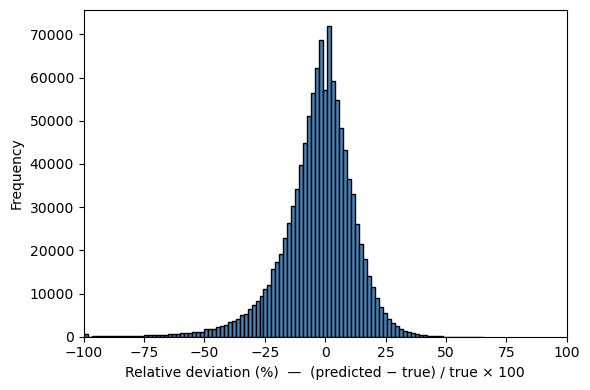

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example: assuming 'rel_error' is a NumPy array of relative errors in percent
# rel_error = (predicted - true) / true * 100

# Limit data to the range -100% ... +100%
clipped = np.clip(rel_error, -100, 100)

# Create histogram
plt.figure(figsize=(6, 4))
plt.hist(clipped, bins=100, color="steelblue", edgecolor="black")
plt.xlabel("Relative deviation (%)  —  (predicted − true) / true × 100")
plt.ylabel("Frequency")
#plt.title("Histogram of relative prediction errors")
plt.xlim(-100, 100)

# Export as vector PDF
plt.tight_layout()
plt.savefig("prediction_error_histogram.pdf", dpi=300, format="pdf")
plt.show()

In [14]:
num_correct = np.sum(rel_error == 0)
total_pairs = len(rel_error)
percentage_correct = num_correct / total_pairs * 100

# Absolute prozentuale Abweichung
abs_rel_error = np.abs(rel_error)

# Zähle Vorhersagen innerhalb von ±5 %, ±10 %, ±15 %
num_within_5  = np.sum(abs_rel_error <=  5)
num_within_10 = np.sum(abs_rel_error <= 10)
num_within_15 = np.sum(abs_rel_error <= 15)
num_within_20 = np.sum(abs_rel_error <= 20)

percentage_within_5  = num_within_5  / total_pairs * 100
percentage_within_10 = num_within_10 / total_pairs * 100
percentage_within_15 = num_within_15 / total_pairs * 100
percentage_within_20 = num_within_20 / total_pairs * 100

# Ausgabe
print(f"Prozentsatz exakter Vorhersagen (0 % Abweichung): {percentage_correct:.2f}%")
print(f"Prozentsatz mit |Abw.| ≤ 5 %:  {percentage_within_5:.2f}%")
print(f"Prozentsatz mit |Abw.| ≤ 10 %: {percentage_within_10:.2f}%")
print(f"Prozentsatz mit |Abw.| ≤ 15 %: {percentage_within_15:.2f}%")
print(f"Prozentsatz mit |Abw.| ≤ 20 %: {percentage_within_20:.2f}%")

Prozentsatz exakter Vorhersagen (0 % Abweichung): 4.84%
Prozentsatz mit |Abw.| ≤ 5 %:  33.97%
Prozentsatz mit |Abw.| ≤ 10 %: 59.12%
Prozentsatz mit |Abw.| ≤ 15 %: 75.42%
Prozentsatz mit |Abw.| ≤ 20 %: 85.51%


Top 10 prozentuale Abweichungen (i, j, true, pred, pct_error):
( 64,288) true=  21  pred=  67  Abw=219.05%
( 90,314) true=  11  pred=  34  Abw=209.09%
(584,985) true=  18  pred=  52  Abw=188.89%
(371,446) true=  16  pred=  46  Abw=187.50%
(127,985) true=  25  pred=  71  Abw=184.00%
(655,956) true=   8  pred=  22  Abw=175.00%
(781,962) true=  25  pred=  68  Abw=172.00%
(248,427) true=  20  pred=  53  Abw=165.00%
(613,764) true=  24  pred=  63  Abw=162.50%
(136,371) true=  18  pred=  47  Abw=161.11%

Durchschnittliche prozentuale Abweichung pro Bin:
klein (<500): 9.69% über 499500 Paare


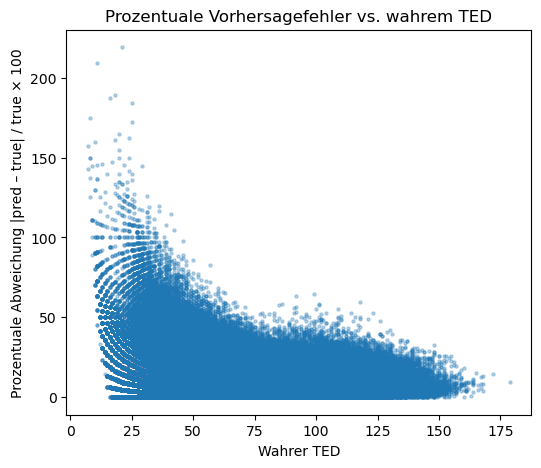

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Daten laden und obere Dreiecksmatrix auslesen
true_ted      = np.loadtxt('../data/ted_matrix.txt',      dtype=int)
predicted_ted = np.loadtxt('predicted_ted_matrix.txt',   dtype=int)
diff          = true_ted - predicted_ted
i, j          = np.triu_indices(true_ted.shape[0], k=1)

true_vals     = true_ted[i, j]
diff_vals     = diff[i, j]

# 2) Prozentuale Abweichung berechnen
#    (predicted – true) / true × 100, aber wir interessiert uns meist für den Betrag
rel_err = np.abs(diff_vals) / true_vals.astype(float) * 100

# 3) Top-10 der größten Prozent-Abweichungen
top10 = np.argsort(rel_err)[-10:][::-1]
print("Top 10 prozentuale Abweichungen (i, j, true, pred, pct_error):")
for idx in top10:
    ti, tj = i[idx], j[idx]
    print(f"({ti:3d},{tj:3d}) true={true_vals[idx]:4d}  "
          f"pred={predicted_ted[ti, tj]:4d}  "
          f"Abw={rel_err[idx]:6.2f}%")

# 4) Mittlere prozentuale Abweichung in TED-Bins
max_ted = true_vals.max()
bins = sorted([0, 500, 2000, max_ted + 1])
bin_labels = ["klein (<500)", "mittel (500–2000)", f"groß (≥{bins[2]})"]
bin_idx = np.digitize(true_vals, bins, right=False) - 1

print("\nDurchschnittliche prozentuale Abweichung pro Bin:")
for b, label in enumerate(bin_labels):
    mask = (bin_idx == b)
    if mask.sum() == 0:
        continue
    mean_pct = rel_err[mask].mean()
    print(f"{label}: {mean_pct:.2f}% über {mask.sum()} Paare")

# 5) Streudiagramm: true_TED vs. prozentuale Abweichung
plt.figure(figsize=(6, 5))
plt.scatter(true_vals, rel_err, s=5, alpha=0.3)
plt.xlabel("Wahrer TED")
plt.ylabel("Prozentuale Abweichung |pred – true| / true × 100")
plt.title("Prozentuale Vorhersagefehler vs. wahrem TED")
plt.show()


In [1]:
import numpy as np
import pandas as pd

# --- Matrizen laden (pfade ggf. anpassen) ---
true_ted      = np.loadtxt('../data/ted_matrix.txt',      dtype=int)
predicted_ted = np.loadtxt('predicted_ted_matrix.txt',    dtype=int)

# --- obere Dreiecksmatrix ohne Diagonale extrahieren ---
i, j = np.triu_indices(true_ted.shape[0], k=1)
t = true_ted[i, j].astype(float)
p = predicted_ted[i, j].astype(float)

# --- DataFrame mit Fehlermaßen ---
df = pd.DataFrame({'true': t, 'pred': p})
df['err']      = df['pred'] - df['true']
df['abs_err']  = df['err'].abs()
df['rel_pct']  = np.where(df['true'] != 0, df['abs_err'] / df['true'] * 100.0, np.nan)

# --- 5er-Binning nach trueTED ---
bin_w   = 5
max_val = int(np.nanmax(df['true']))
edges   = np.arange(0, max_val + bin_w + 1, bin_w)  # [0,5,10,...,max+5]
labels  = [f"{a}–{b-1}" for a, b in zip(edges[:-1], edges[1:])]  # z.B. "0–4", "5–9", ...
df['bin'] = pd.cut(df['true'], bins=edges, right=False, labels=labels)

# Hilfsfunktionen für Prozent-Within-Threshold (NaNs ignorieren)
def pct_within(x, thr):
    x = pd.Series(x).dropna()
    return (np.mean(x <= thr) * 100.0) if len(x) else np.nan

# --- Aggregation pro Bin ---
agg = (
    df.groupby('bin', observed=True)
      .agg(
          n_pairs         = ('true', 'size'),
          true_mean       = ('true', 'mean'),
          true_median     = ('true', 'median'),
          pred_mean       = ('pred', 'mean'),
          pred_median     = ('pred', 'median'),
          bias_mean       = ('err',  'mean'),        # pred - true
          mae             = ('abs_err', 'mean'),
          medae           = ('abs_err', 'median'),
          mape_pct        = ('rel_pct', 'mean'),
          within_5pct     = ('rel_pct', lambda x: pct_within(x, 5)),
          within_10pct    = ('rel_pct', lambda x: pct_within(x, 10))
      )
      .reset_index()
)

# Optional: Gesamtsumme/-mittel als zusätzliche Zeile
overall = pd.DataFrame({
    'bin'          : ['ALL'],
    'n_pairs'      : [len(df)],
    'true_mean'    : [df['true'].mean()],
    'true_median'  : [df['true'].median()],
    'pred_mean'    : [df['pred'].mean()],
    'pred_median'  : [df['pred'].median()],
    'bias_mean'    : [df['err'].mean()],
    'mae'          : [df['abs_err'].mean()],
    'medae'        : [df['abs_err'].median()],
    'mape_pct'     : [df['rel_pct'].mean()],
    'within_5pct'  : [pct_within(df['rel_pct'], 5)],
    'within_10pct' : [pct_within(df['rel_pct'], 10)],
})
table = pd.concat([agg, overall], ignore_index=True)

# Ausgabe & Speichern
pd.set_option('display.max_rows', None)
print(table.to_string(index=False, float_format=lambda v: f"{v:.2f}"))
table.to_csv('predTED_vs_trueTED_by5.csv', index=False)


    bin  n_pairs  true_mean  true_median  pred_mean  pred_median  bias_mean   mae  medae  mape_pct  within_5pct  within_10pct
    5–9       14       8.36         8.50      19.07        19.00      10.71 10.71  10.00    129.66         0.00          0.00
  10–14      460      12.84        13.00      19.83        19.00       6.99  6.99   7.00     55.84         0.00          0.00
  15–19     2648      17.49        18.00      21.57        21.00       4.08  4.18   4.00     24.30         6.23         19.56
  20–24     5987      22.19        22.00      24.77        24.00       2.58  3.78   3.00     17.02        30.73         49.02
  25–29     8202      27.10        27.00      30.47        29.00       3.36  5.42   4.00     19.95        21.60         35.20
  30–34    10866      32.15        32.00      36.77        35.00       4.61  6.51   5.00     20.26        19.00         40.62
  35–39    14594      37.11        37.00      41.75        40.00       4.64  6.66   5.00     17.97        18.35       

== Kennzahlen ==
MAE   vor  : 6.58
MAE   nach : 6.52
MAPE  vor  : 9.69%
MAPE  nach : 9.46%
≤5%   vor  : 39.81%   | nach : 40.29%
≤10%  vor  : 65.42%   | nach : 65.64%


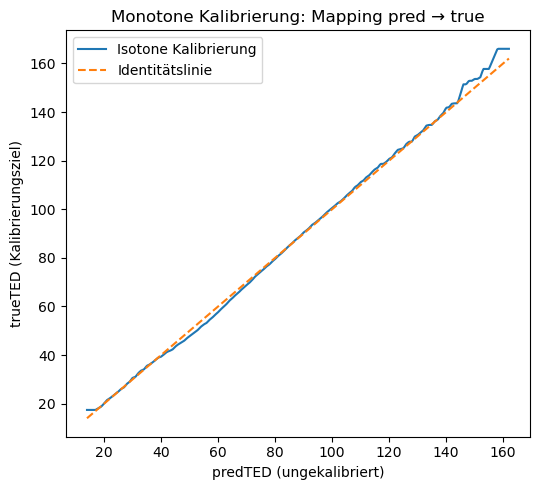

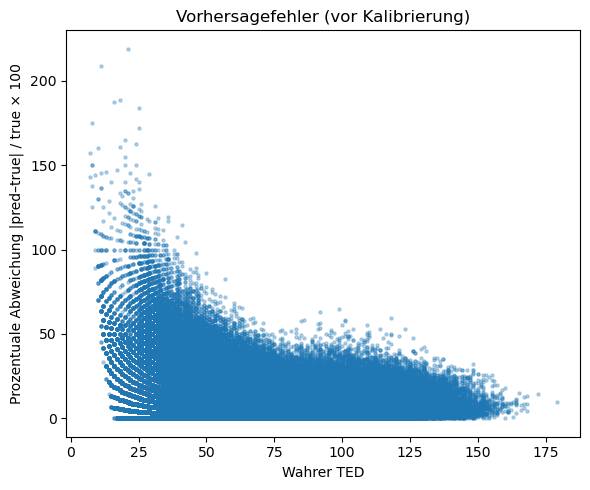

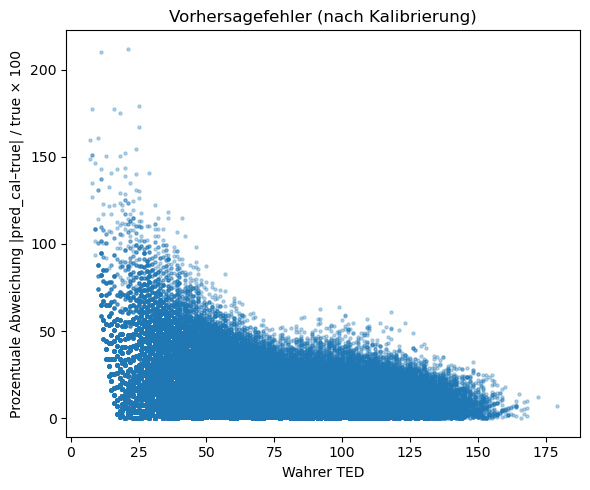

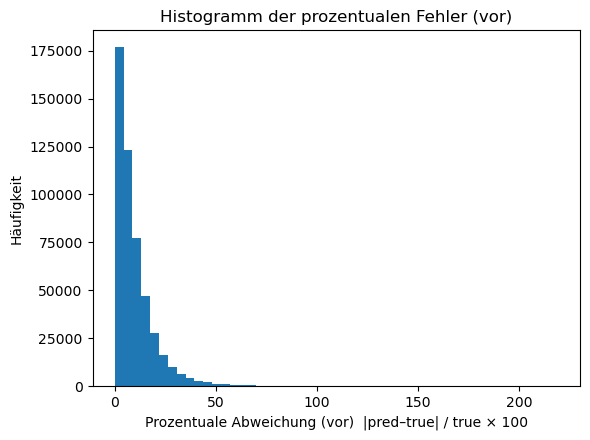

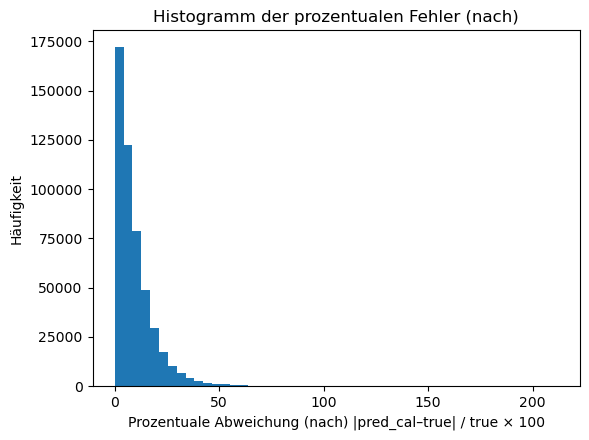


Top 10 %-Abweichungen NACH Kalibrierung (i,j,true,pred_cal,%):
( 64,288) true=21  pred_cal=66  Abw=212.01%
( 90,314) true=11  pred_cal=34  Abw=210.19%
(127,985) true=25  pred_cal=70  Abw=179.05%
(655,956) true=8  pred_cal=22  Abw=177.49%
(371,446) true=16  pred_cal=44  Abw=177.47%
(584,985) true=18  pred_cal=49  Abw=174.94%
(781,962) true=25  pred_cal=67  Abw=166.88%
( 90,282) true=10  pred_cal=26  Abw=160.86%
( 84,263) true=7  pred_cal=18  Abw=159.56%
(613,764) true=24  pred_cal=61  Abw=154.45%


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.isotonic import IsotonicRegression

# --- 1) Daten laden ---
true_ted      = np.loadtxt('../data/ted_matrix.txt',      dtype=float)
predicted_ted = np.loadtxt('predicted_ted_matrix.txt',    dtype=float)

# obere Dreieckseinträge (ohne Diagonale)
i, j = np.triu_indices(true_ted.shape[0], k=1)
t = true_ted[i, j]
p = predicted_ted[i, j]

# --- 2) Isotone Kalibrierung (monotone Regression) lernen ---
# ggf. Subsample, damit das Training nicht zu groß wird
rng = np.random.default_rng(0)
subs = min(300_000, len(t))
idx  = rng.choice(len(t), size=subs, replace=False) if subs < len(t) else slice(None)

iso = IsotonicRegression(y_min=0, increasing=True, out_of_bounds="clip")
iso.fit(p[idx], t[idx])

# Kalibrierte Vorhersagen (Vektor)
p_cal_vec = iso.predict(p)

# Kalibriertes Matrix-Format (symmetrisch, Diagonale=0)
predicted_ted_cal = predicted_ted.copy()
predicted_ted_cal[i, j] = p_cal_vec
predicted_ted_cal[j, i] = p_cal_vec
np.fill_diagonal(predicted_ted_cal, 0.0)

# --- 3) Kennzahlen vor/nach Kalibrierung ---
mask = (t > 0)
abs_err_pre  = np.abs(p[mask]      - t[mask])
abs_err_post = np.abs(p_cal_vec[mask] - t[mask])
rel_pct_pre  = abs_err_pre  / t[mask] * 100.0
rel_pct_post = abs_err_post / t[mask] * 100.0

def pct_within(rel, thr):
    return (np.mean(rel <= thr) * 100.0) if len(rel) else np.nan

print("== Kennzahlen ==")
print(f"MAE   vor  : {abs_err_pre.mean():.2f}")
print(f"MAE   nach : {abs_err_post.mean():.2f}")
print(f"MAPE  vor  : {rel_pct_pre.mean():.2f}%")
print(f"MAPE  nach : {rel_pct_post.mean():.2f}%")
print(f"≤5%   vor  : {pct_within(rel_pct_pre, 5):.2f}%   | nach : {pct_within(rel_pct_post, 5):.2f}%")
print(f"≤10%  vor  : {pct_within(rel_pct_pre,10):.2f}%   | nach : {pct_within(rel_pct_post,10):.2f}%")

# --- 4) Plots ---

# (A) Kalibrierungsfunktion f(pred) ~ true  + Identität
plt.figure(figsize=(5.5, 5))
# Stützkurve (glatt) über dem beobachteten Bereich
xg = np.linspace(p.min(), p.max(), 400)
yg = iso.predict(xg)
plt.plot(xg, yg, label="Isotone Kalibrierung")
plt.plot(xg, xg, linestyle='--', label="Identitätslinie")
plt.xlabel("predTED (ungekalibriert)")
plt.ylabel("trueTED (Kalibrierungsziel)")
plt.title("Monotone Kalibrierung: Mapping pred → true")
plt.legend()
plt.tight_layout()
plt.show()

# (B) Fehler-Scatter: wahrer TED vs. %-Abweichung (vor Kalibrierung)
plt.figure(figsize=(6, 5))
plt.scatter(t[mask], rel_pct_pre, s=5, alpha=0.3)
plt.xlabel("Wahrer TED")
plt.ylabel("Prozentuale Abweichung |pred–true| / true × 100")
plt.title("Vorhersagefehler (vor Kalibrierung)")
plt.tight_layout()
plt.show()

# (C) Fehler-Scatter: wahrer TED vs. %-Abweichung (nach Kalibrierung)
plt.figure(figsize=(6, 5))
plt.scatter(t[mask], rel_pct_post, s=5, alpha=0.3)
plt.xlabel("Wahrer TED")
plt.ylabel("Prozentuale Abweichung |pred_cal–true| / true × 100")
plt.title("Vorhersagefehler (nach Kalibrierung)")
plt.tight_layout()
plt.show()

# (D) Histogramm der %-Abweichungen (vor)
plt.figure(figsize=(6, 4.5))
plt.hist(rel_pct_pre, bins=50)
plt.xlabel("Prozentuale Abweichung (vor)  |pred–true| / true × 100")
plt.ylabel("Häufigkeit")
plt.title("Histogramm der prozentualen Fehler (vor)")
plt.tight_layout()
plt.show()

# (E) Histogramm der %-Abweichungen (nach)
plt.figure(figsize=(6, 4.5))
plt.hist(rel_pct_post, bins=50)
plt.xlabel("Prozentuale Abweichung (nach) |pred_cal–true| / true × 100")
plt.ylabel("Häufigkeit")
plt.title("Histogramm der prozentualen Fehler (nach)")
plt.tight_layout()
plt.show()

# --- 5) Optional: Top-10 nach Kalibrierung ausgeben ---
top10 = np.argsort(rel_pct_post)[-10:][::-1]
print("\nTop 10 %-Abweichungen NACH Kalibrierung (i,j,true,pred_cal,%):")
for idx in top10:
    ti, tj = i[idx], j[idx]
    print(f"({ti:3d},{tj:3d}) true={t[idx]:.0f}  pred_cal={p_cal_vec[idx]:.0f}  Abw={rel_pct_post[idx]:6.2f}%")

# --- 6) (Optional) Kalibrierte Matrix speichern ---
np.savetxt('predicted_ted_matrix_calibrated.txt', predicted_ted_cal, fmt="%.6f")


In [4]:
import numpy as np
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import pairwise_distances
from collections import defaultdict

# --- Daten & obere Dreieckswerte laden ---
true_ted      = np.loadtxt('../data/ted_matrix.txt',   dtype=float)
predicted_ted = np.loadtxt('predicted_ted_matrix.txt', dtype=float)
i, j = np.triu_indices(true_ted.shape[0], k=1)
t = true_ted[i, j]
p = predicted_ted[i, j]

# --- Isotone Kalibrierung (wie zuvor) ---
iso = IsotonicRegression(y_min=0, increasing=True, out_of_bounds="clip").fit(p, t)
p_cal_vec = iso.predict(p)

# --- (a) Bin-Vergleich: Bias & MAPE vor/nach ---
bins = np.arange(0, int(t.max()) + 5, 5)
bin_idx = np.digitize(t, bins, right=False) - 1

def bin_stats(t, pvec, name):
    err  = pvec - t
    aerr = np.abs(err)
    rel  = aerr / np.maximum(t, 1e-9) * 100
    rows = []
    for b in range(len(bins)-1):
        m = (bin_idx == b)
        if m.sum() == 0: continue
        rows.append({
            "bin": f"{bins[b]}–{bins[b+1]-1}",
            f"n_{name}": int(m.sum()),
            f"bias_{name}": err[m].mean(),
            f"MAE_{name}": aerr[m].mean(),
            f"MAPE_{name}": rel[m].mean(),
        })
    return rows

rows_pre  = bin_stats(t, p,         "pre")
rows_post = bin_stats(t, p_cal_vec, "post")

# Mergen & kompakt ausgeben
by_bin = defaultdict(dict)
for r in rows_pre:  by_bin[r["bin"]].update(r)
for r in rows_post: by_bin[r["bin"]].update(r)
bins_sorted = sorted(by_bin.keys(), key=lambda s: int(s.split("–")[0]))
print("Bin  n_pre  n_post  bias_pre  bias_post  MAPE_pre  MAPE_post")
for b in bins_sorted[:20]:  # ggf. begrenzen
    r = by_bin[b]
    print(f"{b:>7} {r.get('n_pre',0):6d} {r.get('n_post',0):7d} "
          f"{r['bias_pre']:9.2f} {r['bias_post']:10.2f} "
          f"{r['MAPE_pre']:9.2f}% {r['MAPE_post']:10.2f}%")

# --- (b) Recall@K der nächsten Nachbarn (Ranking-Qualität) ---
# Achtung: Wir nehmen hier die MATRIZEN (nicht condensed)
pred_cal = predicted_ted.copy()
pred_cal[i, j] = p_cal_vec
pred_cal[j, i] = p_cal_vec
np.fill_diagonal(pred_cal, 0)

def recall_at_k(D_true, D_pred, ks=(1,5,10,20,50)):
    # Kleinere Distanz = näher
    order_true = np.argsort(D_true, axis=1)
    order_pred = np.argsort(D_pred, axis=1)
    res = {}
    for K in ks:
        match = []
        for r in range(D_true.shape[0]):
            nn_true = set(order_true[r, 1:K+1])   # skip self (Spalte 0)
            nn_pred = set(order_pred[r, 1:K+1])
            match.append(len(nn_true & nn_pred) / max(1, len(nn_true)))
        res[K] = 100.0 * np.mean(match)
    return res

rec_pre  = recall_at_k(true_ted, predicted_ted)
rec_post = recall_at_k(true_ted, pred_cal)
print("\nRecall@K [%] (vor → nach):")
for K in [1,5,10,20,50]:
    print(f"K={K:2d}: {rec_pre[K]:.2f} → {rec_post[K]:.2f}")


Bin  n_pre  n_post  bias_pre  bias_post  MAPE_pre  MAPE_post
    5–9     14      14     10.71      10.66    129.66%     129.08%
  10–14    460     460      6.99       7.02     55.84%      56.01%
  15–19   2648    2648      4.08       4.16     24.30%      24.82%
  20–24   5987    5987      2.58       2.66     17.02%      17.18%
  25–29   8202    8202      3.36       3.34     19.95%      19.73%
  30–34  10866   10866      4.61       4.28     20.26%      18.86%
  35–39  14594   14594      4.64       3.79     17.97%      15.32%
  40–44  17530   17530      4.41       2.98     16.17%      13.45%
  45–49  19697   19697      4.46       2.56     14.81%      12.74%
  50–54  21412   21412      4.53       2.48     13.33%      12.20%
  55–59  22810   22810      4.45       2.57     12.22%      11.89%
  60–64  25097   25097      4.38       2.88     11.24%      11.21%
  65–69  28543   28543      3.95       2.84     10.07%      10.23%
  70–74  33435   33435      3.16       2.40      8.86%       9.16%
 

In [1]:
import numpy as np
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import adjusted_rand_score

def get_min_cluster_size(Z, d, ignore_size=3):
    """
    Gibt die Größe des kleinsten Clusters zurück, das mindestens ignore_size Elemente hat,
    wenn man bei Distanz d flat‐clustert.
    """
    labels = fcluster(Z, t=d, criterion='distance')
    unique, counts = np.unique(labels, return_counts=True)
    counts = counts[counts >= ignore_size]
    return min(counts) if len(counts) > 0 else 0

def find_optimal_threshold(Z, min_size, ignore_size=3):
    """
    Sucht per Binärsuche den kleinstmöglichen ganzzahligen Threshold d, 
    bei dem alle Cluster ≥ ignore_size auch mindestens min_size Mitglieder haben.
    """
    # Distanzbereich abstecken
    mind = int(np.floor(Z[:,2].min()))
    maxd = int(np.ceil(Z[:,2].max()))
    left, right = mind, maxd

    while left < right:
        mid = (left + right) // 2
        if get_min_cluster_size(Z, mid, ignore_size) < min_size:
            left = mid + 1
        else:
            right = mid

    # Prüfen, ob der gefundene Wert valid ist
    return left if get_min_cluster_size(Z, left, ignore_size) >= min_size else None

# ----------------------------
# 1. Daten einlesen
true_ted      = np.loadtxt('../data/ted_matrix.txt',     dtype=int)
predicted_ted = np.loadtxt('predicted_ted_matrix.txt',   dtype=int)

# 2. In kondensierte Distanzvektoren umwandeln
cond_true = squareform(true_ted)
cond_pred = squareform(predicted_ted)

# 3. Hierarchische Clusterung (Average Linkage)
Z_true = linkage(cond_true,  method='average')
Z_pred = linkage(cond_pred, method='average')

# 4. Dynamischen Threshold bestimmen (ersetze min_size/ignore_size nach Bedarf)
min_size   = 30    # gewünschte minimale Clustergröße
ignore_size = 3    # Kleinstgröße, die wir zur Filterung von Ausreißer-Clusters ignorieren
threshold = find_optimal_threshold(Z_true, min_size, ignore_size)
if threshold is None:
    raise ValueError("Kein Threshold gefunden, der ≥%d Elemente in jedem relevanten Cluster sicherstellt." % min_size)
print(f"Verwendeter dynamischer Threshold: {threshold}")

# 5. Clusterlabels bei diesem Threshold extrahieren
labels_true = fcluster(Z_true, threshold, criterion='distance')
labels_pred = fcluster(Z_pred, threshold, criterion='distance')

num_clusters_true = len(np.unique(labels_true))
num_clusters_pred = len(np.unique(labels_pred))
print(f"Number of true subclusters: {num_clusters_true}")
print(f"Number of predicted subclusters: {num_clusters_pred}")


# 6a. Adjusted Rand Index
ari = adjusted_rand_score(labels_true, labels_pred)

# 6b. Paarweise Übereinstimmungen
n = len(labels_true)
agree = 0
total = 0
for i in range(n):
    for j in range(i+1, n):
        same_true = (labels_true[i] == labels_true[j])
        same_pred = (labels_pred[i] == labels_pred[j])
        if same_true == same_pred:
            agree += 1
        total += 1
pairwise_match_percent = agree / total * 100

# 7. Ausgabe der Ergebnisse
print(f"Adjusted Rand Index: {ari:.3f}")
print(f"Paarweise Cluster‐Übereinstimmung: {pairwise_match_percent:.2f}%")


Verwendeter dynamischer Threshold: 102
Number of true subclusters: 3
Number of predicted subclusters: 3
Adjusted Rand Index: 0.184
Paarweise Cluster‐Übereinstimmung: 92.31%
